# SSVEP using machine learning (ML)

In [104]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from IPython import get_ipython
import seaborn as sns
import glob
import pandas as pd
from scipy import signal

In [105]:
# extracted from : https://stackoverflow.com/questions/39032325/python-high-pass-filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [106]:
def fourier(node):
    y = df[node]
    y = butter_highpass_filter(y,5,256,5)   
    ps = np.abs(np.fft.fft(y))**2

    time_step = float(1)/256
    freqs = np.fft.fftfreq( y.size , time_step )
    idx = np.argsort(freqs)
    
    return freqs,ps,idx

In [121]:
file_ = ('../Data/SSVEP_Public/SSVEP_14Hz_Trial1_SUBJ1.MAT' + ".csv")

df = pd.read_csv(file_,index_col=None, header=0,skiprows=range(1, 35))

rows,clmns = df.shape 

df = df.loc[256 :10*256]

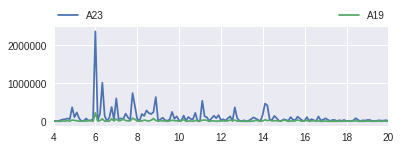

In [122]:
# display of all the nodes with values

f1,p1,i1 = fourier('A23')
f2,p2,i2 = fourier('A19')

plt.figure(1)
plt.subplot(211)

plt.plot(f1[i1] , p1[i1],label="A23")
plt.plot(f2[i2] , p2[i2],label="A19")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


plt.xlim([4,20])
plt.show()

In [94]:
print i2

[1153 1154 1155 ..., 1150 1151 1152]


In [95]:
print f1[73]

8.10759219089


Here we found the index of 8 Hz in frequency list

In [96]:
print p1[73]
print p2[73]

46699.9888398
12870.528629


In [97]:
print f2[73]

8.10759219089


Here we found the index of 15 Hz in frequency list